### Load data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [4]:
# Load data from file
df = pd.read_csv('/Users/cheng/Desktop/music/df_model_final.csv')

In [5]:
# Browse dataset
df.head(10)

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,freq_D_last_14,freq_D_last_30,freq_S_last_1,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_30,device_type
0,104777734,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,2
1,11596711,0,13,28,47,82,129,0,0,0,0,0,0,2,3,11,21,2
2,120180992,1,0,0,0,10,58,0,0,0,0,0,0,0,0,0,2,2
3,128106175,1,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,1
4,129766230,0,165,259,362,671,1339,0,0,0,0,0,1,2,12,17,53,2
5,157309586,1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,2
6,167570402,0,0,12,19,44,91,0,0,0,0,1,0,1,2,7,9,2
7,167571220,1,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,2
8,167571223,0,0,8,887,1023,1583,0,0,10,10,35,0,0,0,0,0,2
9,167572530,1,0,0,0,36,181,0,0,0,0,0,0,0,0,7,31,2


In [6]:
# Show summary stats
df.describe()

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,freq_D_last_14,freq_D_last_30,freq_S_last_1,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_30,device_type
count,6.417800e+04,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000,64178.000000
mean,1.675528e+08,0.611783,3.707844,11.615725,26.051108,56.526177,154.451292,0.156035,0.400714,0.894263,1.970270,8.974446,0.150425,0.371108,1.222693,2.998598,10.861682,1.858004
std,9.200542e+06,0.487348,17.760129,43.819037,83.928629,157.551686,326.530503,6.588851,7.785825,10.938724,17.459795,43.349064,1.335688,2.450578,5.727471,11.112112,28.642183,0.366640
min,6.018300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.679429e+08,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.684039e+08,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,1.687423e+08,1.000000,0.000000,0.000000,11.000000,39.000000,155.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,10.000000,2.000000
max,1.692547e+08,1.000000,996.000000,2087.000000,3026.000000,4641.000000,10538.000000,1493.000000,1493.000000,1493.000000,1493.000000,2424.000000,78.000000,285.000000,285.000000,397.000000,1526.000000,2.000000


In [7]:
df['device_type_1'] = (df['device_type'] == 1).astype(int)
df['device_type_2'] = (df['device_type'] == 2).astype(int)

### Define Features and Target

In [8]:
selected_features = list(df.columns.values)

In [9]:
selected_features.remove('uid')
selected_features.remove('label')
selected_features.remove('device_type')
selected_features

['freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'freq_S_last_1',
 'freq_S_last_3',
 'freq_S_last_7',
 'freq_S_last_14',
 'freq_S_last_30',
 'device_type_1',
 'device_type_2']

In [10]:
X = df[selected_features]
y = df['label']

In [11]:
X.shape

(64178, 17)

In [12]:
y[:10]

0    1
1    0
2    1
3    1
4    0
5    1
6    0
7    1
8    0
9    1
Name: label, dtype: int64

#### Let's Train-test split the data!

In [13]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### Train model using sklearn

In [14]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


### Calculate the metric scores for the model

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [16]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [17]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

### Logistic Regression

              train      test
metrics                      
AUC        0.860041  0.850869
Accuracy   0.780658  0.774151
Precision  0.753684  0.749460
Recall     0.952181  0.948720
f1-score   0.841384  0.837400


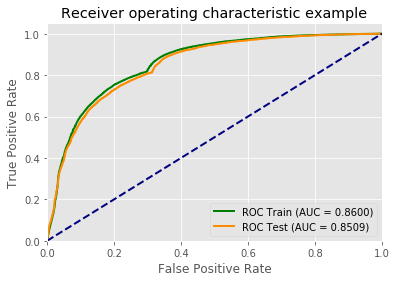

In [18]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=0.5, penalty='l2')
# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

              train      test
metrics                      
AUC        0.921424  0.891080
Accuracy   0.856853  0.827672
Precision  0.860482  0.837359
Recall     0.913883  0.892165
f1-score   0.886379  0.863894


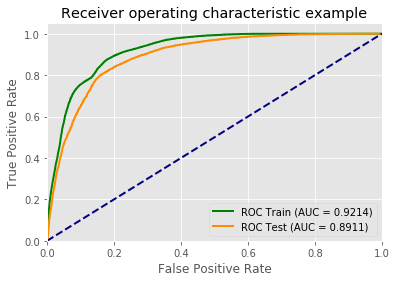

In [19]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 100,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 30,
              'min_samples_split': 2,
              'min_samples_leaf': 10,
              'random_state': 42,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

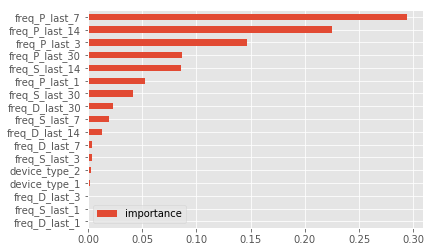

In [20]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()

### Gradient Boosting Trees

              train      test
metrics                      
AUC        0.908212  0.890505
Accuracy   0.849997  0.825569
Precision  0.858934  0.839515
Recall     0.902746  0.884540
f1-score   0.880295  0.861439


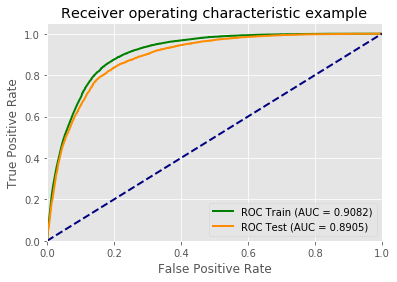

In [21]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Neural Network

              train      test
metrics                      
AUC        0.878693  0.870392
Accuracy   0.820496  0.813143
Precision  0.839894  0.834107
Recall     0.872524  0.867764
f1-score   0.855898  0.850603


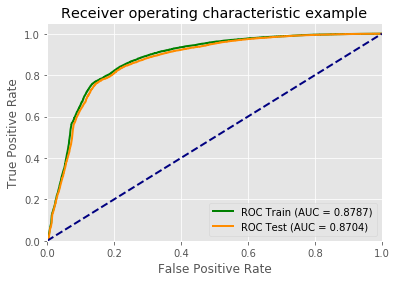

In [22]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(10,10), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [50,100,200], 
              'max_features': ['auto', 'log2'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,40],
              'n_jobs':[-1, 1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.937808  0.890619
Accuracy   0.889680  0.824595
Precision  0.885807  0.839437
Recall     0.940704  0.882697
f1-score   0.912430  0.860523


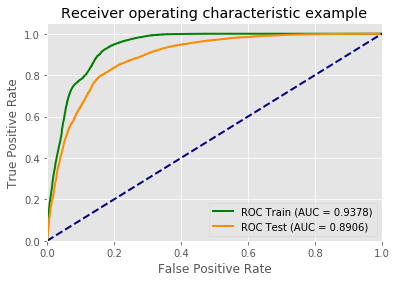

In [24]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)